<a href="https://colab.research.google.com/github/iqbalparekh97/DeepLearning/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation Model
The following is a segmentation model that can recognize the content of every individual pixel in an image. I am using a subset of the Camvid dataset from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database" by Gabruel J. Brostow, Julien Fauqueur, and Roberto Cipolla


In [1]:
##The following is a Segmentation model
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,time
0,3.153036,2.178525,01:26


epoch,train_loss,valid_loss,time
0,1.805596,1.535382,01:28
1,1.561820,1.195536,01:29
2,1.385956,1.066301,01:28
3,1.265656,0.915040,01:28
4,1.147972,0.789136,01:31
5,1.048557,0.755202,01:28
6,0.964028,0.720189,01:29
7,0.895700,0.710760,01:29


The model classifies every pixel in every object. For instance, notice that all of the cars are overlaid with the same color and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label and the right is the prediction from the model)

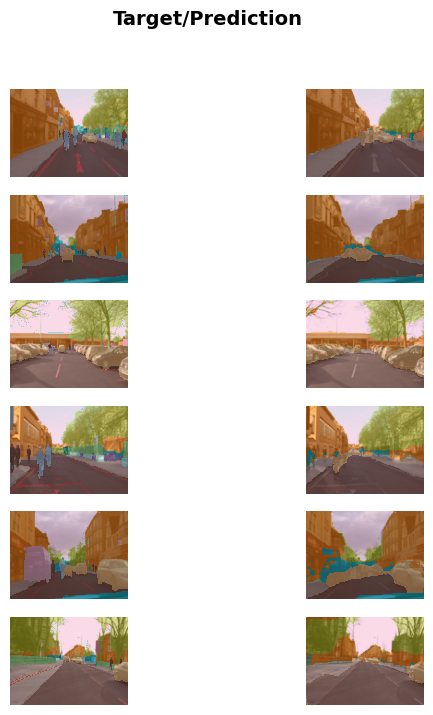

In [2]:
learn.show_results(max_n=6, figsize=(7,8))
